Use simple neural network for regression - predict nonlinear, periodic function in 3D coordinate system

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
N = 1000
X = np.random.random((N,2)) * 6 - 3 # uniform distribution (-3,3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # nonlinear function with a few bumps and curves

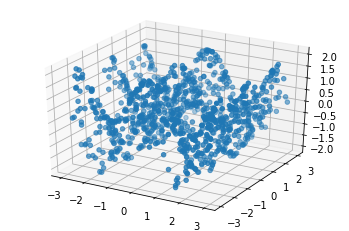

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
                    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
                    tf.keras.layers.Dense(1)  # no activation, bc it's regression
])

In [ ]:
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

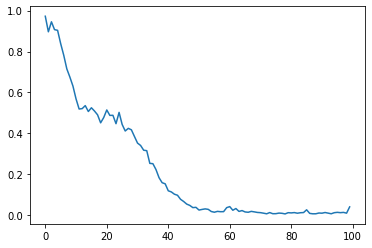

In [ ]:
plt.plot(r.history['loss'], label='loss')

Model was trained on dataset from certain range - and it scores fairly well on this range

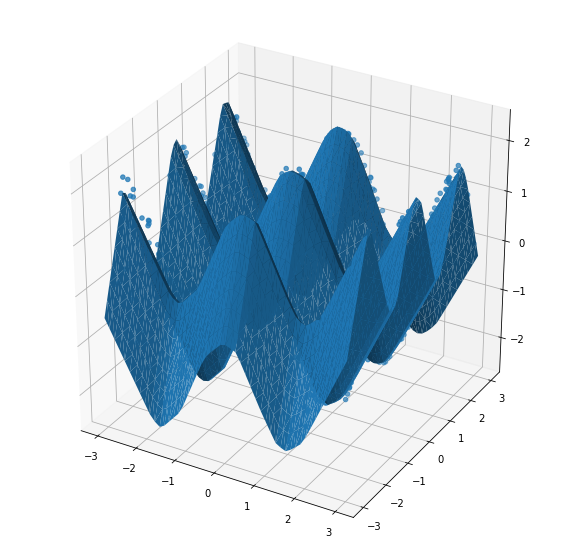

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

Attempts of predicting function far from the training set are nonsense

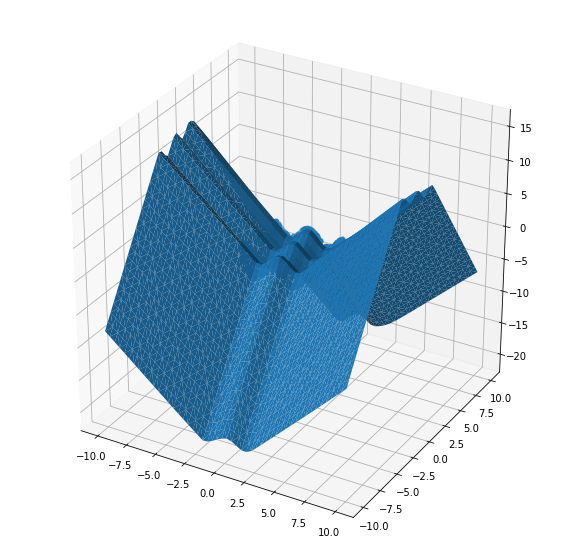

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

line = np.linspace(-10, 10, 50)     # ANN does not have periodic activation function so it'll just assume that the pattern continues in the same direction (!!!)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()